In [47]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

**Constants definition**

In [48]:
q = 1.602E-19
k = 1.38E-23

**Parameters Adquired from DataSheet**

In [49]:
Isc = 10.28; Impp = 9.70; #( A )
Voc = .708; Vmpp = .582;  #( V )
Tcs = 298.0;              # PV cell temperature at STC
Ainv = 0.7;

In [50]:
Vtcs = (k * Tcs) / q; # Thermal voltage at STC

C1 = Vmpp / Vtcs;
C2 = Voc / Vtcs;
C3 = 1 - Impp / Isc;

In [51]:
err=1;i = 1
while err > 10E-6:
    Ainv = Ainv - (exp(C1*Ainv) - C3 * exp(C2*Ainv) - 1 + C3) / (C1 * Ainv * exp(C1*Ainv)- C2 * C3 * Ainv * exp(C2*Ainv))
    err = exp(C1*Ainv) - C3 * exp(C2*Ainv)
    i=i+1
    
print("The value of the ideality factor A is: ", round(1/Ainv, 2))

The value of the ideality factor A is:  1.52


In [52]:
Iss = Isc / ( exp(C2*Ainv) - 1 )

### I-V Curve

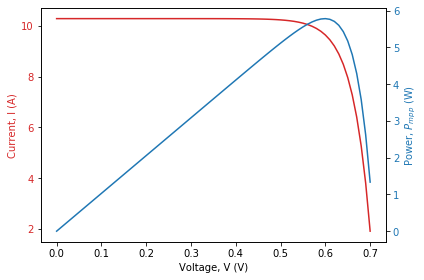

In [57]:
Vpv = np.arange(0,Voc,.01)
Ipv = Isc - Iss * (np.exp(Vpv * Ainv/Vtcs) - 1)
Pmpp = Ipv * Vpv

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Voltage, V (V)")
ax1.set_ylabel("Current, I (A)", color=color)
ax1.plot(Vpv,Ipv, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"Power, $P_{mpp}$ (W)", color=color)  # we already handled the x-label with ax1
ax2.plot(Vpv,Pmpp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Photocurrent Corrected by Instant Irradiance

In [54]:
Ea = np.arange(800,1300,100)
deltaT = 328.23 - 298.23; Tki = .03/100
Iph = (Ea/1000) * Isc * (1 - Tki*deltaT)
print(Iph)

[ 8.149984  9.168732 10.18748  11.206228 12.224976]


In [55]:
Ipv = [Iph[i] - Iss * (np.exp(Vpv * Ainv/Vtcs) - 1) for i in range(0,5)];
Pmpp = Vpv * Ipv

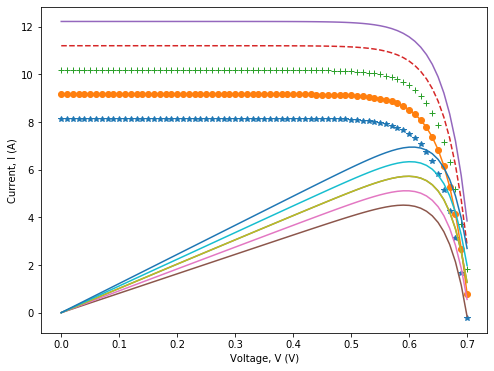

In [56]:
plt.figure(figsize=(8,6))
plt.plot(Vpv,Ipv[0],'*',Vpv,Ipv[1],'-o',Vpv,Ipv[2],'+',Vpv,Ipv[3],'--',Vpv,Ipv[4])
plt.plot(Vpv,Pmpp[0],Vpv,Pmpp[1],Vpv,Pmpp[2],Vpv,Pmpp[2],Vpv,Pmpp[3],Vpv,Pmpp[4])
plt.xlabel("Voltage, V (V)"), plt.ylabel("Current, I (A)")
plt.show()